# Activité guidée : Découverte de Pandas

**Mise en situation :**

Félicitations, vous venez de décrocher votre premier job au sein de la FAO (Organisation des Nations Unies pour l’alimentation et l’agriculture).

Votre première mission est de réaliser une étude sur la démographie et la nutrition.


## Étape n°1 : Récupérer les jeux de données

In [170]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_anim = pd.read_csv("FAO_anim_en.csv")
df_veg = pd.read_csv("FAO_veg_en.csv")
df_pop = pd.read_csv("FAO_pop_en.csv")

## Étape n°2 : Nettoyage et préparation des données

### 1. Nettoyer les titres de colonnes

In [171]:
df_anim.columns = df_anim.columns.str.strip().str.lower().str.replace(' ', '_')
df_veg.columns = df_veg.columns.str.strip().str.lower().str.replace(' ', '_')
df_pop.columns = df_pop.columns.str.strip().str.lower().str.replace(' ', '_')

### 2. Quels sont les dimensions des jeux de données

In [172]:
print("Shape df_anim :",df_anim.shape)
print("Shape df_veg :",df_veg.shape,)
print("Shape df_pop :",df_pop.shape)


Shape df_anim : (31542, 14)
Shape df_veg : (93458, 14)
Shape df_pop : (366, 14)


### 3.A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [173]:
df_anim.head(5)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


In [174]:
df_veg.head(5)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


In [175]:
df_pop.head(5)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations


### 4. Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product.

In [176]:
df_anim["type"] = "animal"
df_veg["type"] = "vegetal"


In [177]:
products = pd.concat([df_anim, df_veg])

### 5. Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’.

In [178]:
df_pop=df_pop[["area_code_(fao)","area", "year", "value" ]].rename(columns={"value":"pop_1000_hab"})
df_pop.head(5)

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00


### 6. Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.

In [179]:
products=products[["area_code_(fao)","area", "element", "item", "year", "type", "unit", "value"]]
products.head(5)


,area_code_(fao),area,element,item,year,type,unit,value
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,animal,kg,2.62
1,2,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,animal,kg,2.73
2,2,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2018,animal,kcal/capita/day,15.42
3,2,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2019,animal,kcal/capita/day,16.03
4,2,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,2018,animal,g/capita/day,1.09


### 7. Fusionnez df_pop avec products et nommez ce DataFrame df. Renommer les colonnes.

In [180]:
df = pd.merge(df_pop, products, on=["area_code_(fao)", "year", "area"])
df.head(5)

,area_code_(fao),area,year,pop_1000_hab,element,item,type,unit,value
0,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Bovine Meat,animal,kg,2.62
1,2,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Bovine Meat,animal,kcal/capita/day,15.42
2,2,Afghanistan,2018,37172.0,Protein supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.09
3,2,Afghanistan,2018,37172.0,Fat supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.20
4,2,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,animal,kg,4.26


### 8. Quelles sont les types de données de chaque colonne ?

In [181]:
df.dtypes

area_code_(fao)      int64
area                object
year                 int64
pop_1000_hab       float64
element             object
item                object
type                object
unit                object
value              float64
dtype: object

### 9. Combien y-a t’il de valeurs manquantes par variable ?

In [182]:
print(df.isna().sum())


area_code_(fao)    0
area               0
year               0
pop_1000_hab       0
element            0
item               0
type               0
unit               0
value              0
dtype: int64


### 10. Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.)

In [183]:
df.describe()
df = df.drop(df[df['value'] == df['value'].min()].index[0])

In [184]:
df.describe()

,area_code_(fao),year,pop_1000_hab,value
count,124999.000000,124999.000000,1.249990e+05,124999.000000
mean,128.742166,2018.508588,5.143141e+04,11.001112
std,75.251123,0.499928,1.872546e+05,56.218289
min,1.000000,2018.000000,1.076000e+01,0.000000
25%,66.000000,2018.000000,2.801000e+03,0.000000
50%,124.000000,2019.000000,9.965000e+03,0.190000
75%,191.000000,2019.000000,3.182529e+04,2.800000
max,351.000000,2019.000000,1.465634e+06,1779.760000


### 11.Affichez les valeurs uniques de la colonne area

In [185]:
df["area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fre

### 12. Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) 
Note : en fonction de votre méthode d’importation de données cette étape est facultative.

### 13. Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. 

In [186]:
df = pd.pivot_table(df, index=["area_code_(fao)", "area", "year", "pop_1000_hab", "type", "item"], columns="element", values="value")
df=df.reset_index()
df.head(5)

element,area_code_(fao),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,2951.74,animal,"Aquatic Animals, Others",0.00,0.01,0.00,0.00
1,1,Armenia,2018,2951.74,animal,Aquatic Plants,0.00,0.00,0.00,0.00
2,1,Armenia,2018,2951.74,animal,Bovine Meat,11.65,148.82,24.91,10.27
3,1,Armenia,2018,2951.74,animal,"Butter, Ghee",3.54,31.33,1.59,0.04
4,1,Armenia,2018,2951.74,animal,Cephalopods,0.00,0.01,0.00,0.00


In [187]:
df.info
df=df.rename(columns={ "area_code_(fao)" : "area_country", "area" : "country"})
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

element,area_country,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,Armenia,2018,2951.74,animal,"Aquatic Animals, Others",0.00,0.01,0.00,0.00
1,1,Armenia,2018,2951.74,animal,Aquatic Plants,0.00,0.00,0.00,0.00
2,1,Armenia,2018,2951.74,animal,Bovine Meat,11.65,148.82,24.91,10.27
3,1,Armenia,2018,2951.74,animal,"Butter, Ghee",3.54,31.33,1.59,0.04
4,1,Armenia,2018,2951.74,animal,Cephalopods,0.00,0.01,0.00,0.00


In [188]:
df.info

<bound method DataFrame.info of element  area_country  country  year  pop_1000_hab     type  \
0                   1  Armenia  2018       2951.74   animal   
1                   1  Armenia  2018       2951.74   animal   
2                   1  Armenia  2018       2951.74   animal   
3                   1  Armenia  2018       2951.74   animal   
4                   1  Armenia  2018       2951.74   animal   
...               ...      ...   ...           ...      ...   
31423             351    China  2019    1465634.16  vegetal   
31424             351    China  2019    1465634.16  vegetal   
31425             351    China  2019    1465634.16  vegetal   
31426             351    China  2019    1465634.16  vegetal   
31427             351    China  2019    1465634.16  vegetal   

element                     item  fat_supply_quantity_(g/capita/day)  \
0        Aquatic Animals, Others                                0.00   
1                 Aquatic Plants                                0.0

### 15. Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [189]:
df_masque_2018 = df['year'] == 2018
df[df_masque_2018]

df_masque_2019 = df['year'] == 2019
df[df_masque_2019]

element,area_country,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
86,1,Armenia,2019,2957.73,animal,"Aquatic Animals, Others",0.00,0.00,0.00,0.00
87,1,Armenia,2019,2957.73,animal,Aquatic Plants,0.00,0.00,0.00,0.00
88,1,Armenia,2019,2957.73,animal,Bovine Meat,11.45,145.86,24.31,9.99
89,1,Armenia,2019,2957.73,animal,"Butter, Ghee",2.98,26.36,1.34,0.03
90,1,Armenia,2019,2957.73,animal,Cephalopods,0.00,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,1465634.16,vegetal,Tomatoes and products,0.29,18.70,35.75,1.07
31424,351,China,2019,1465634.16,vegetal,"Vegetables, other",1.93,213.68,321.88,12.39
31425,351,China,2019,1465634.16,vegetal,Wheat and products,3.15,580.98,66.52,18.65
31426,351,China,2019,1465634.16,vegetal,Wine,0.00,3.48,1.86,0.00


### 16. Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. 


In [190]:
list_name = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america',
             'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia',
             'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia',
             'micronesia', 'polynesia']

def clean_dataframe(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

#Ajoute la colonne zone au df
def add_zone_column(df, zone):
    df['zone'] = zone
    return df

#Crée un df par zone, avec une colonne zone
def create_dataframes(zone_names):
    for zone in zone_names:
        filename = f"{zone}.csv"
        df = pd.read_csv(filename)
        df = clean_dataframe(df)
        df = add_zone_column(df, zone)
        globals()[f"df_{zone}"] = df[['zone','area_code_(fao)']]
    return [f"df_{zone}" for zone in zone_names]

#Fusionne tous les df, supprime les duplicats, pour obtenir un df avec une correspondance zone - code du pays
def merge_datasets(df_names):
    merged_df = globals()[df_names[0]]
    
    for df_name in df_names[1:]:
        df = globals()[df_name]
        merged_df = pd.concat([merged_df, df], axis=0)
    
    merged_df = merged_df.reset_index(drop=True)
    merged_df = merged_df.drop_duplicates()
    merged_df=merged_df.rename(columns={ "area_code_(fao)" : "area_country"})
    
    for df_name in df_names:
        del globals()[df_name]
        
    return merged_df


df_names = create_dataframes(list_name)
df_zones = merge_datasets(df_names)

#Fusion des df pour ajouter la colonne zone au df principal
df = df.merge(df_zones, on='area_country')
zone = df.pop('zone')
df.insert(1, 'zone', zone)

In [191]:
df_zones.head(5)

,zone,area_country
0,eastern_africa,29
2,eastern_africa,45
4,eastern_africa,72
6,eastern_africa,238
8,eastern_africa,114


## Étape n°3 : Exploration

### 1. Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? Interprétez ces mesures statistiques dans une phrase.

In [192]:
df['fat_supply_quantity_(g/capita/day)'].describe()

count    31020.000000
mean         1.072028
std          3.484045
min          0.000000
25%          0.000000
50%          0.030000
75%          0.360000
max         83.770000
Name: fat_supply_quantity_(g/capita/day), dtype: float64

Cela indique que la distribution des données est très asymétrique, avec une moyenne supérieure à la médiane, ce qui est dû à la présence de valeurs extrêmement élevées. La plupart des pays ont une consommation de graisses inférieure à 0,36 g/capita/jour, avec une médiane de 0,03 g/capita/jour et un premier quartile de 0,00 g/capita/jour. Cependant, certains pays ont des niveaux de consommation très élevés, ce qui explique l'écart type élevé.

### 2. Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données.

In [193]:
import matplotlib.pyplot as plt

# Variables numériques
num_vars = ['fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)', 
            'food_supply_quantity_(kg/capita/yr)', 'protein_supply_quantity_(g/capita/day)']


### 3. Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [194]:
population_ukraine_2019 = int(df.loc[(df['country'] == 'Ukraine') & (df['year'] == 2019), 'pop_1000_hab'].iloc[0])*1000
print(f"En 2019, la population en Ukraine est de {population_ukraine_2019:,} habitants")

En 2019, la population en Ukraine est de 43,993,000 habitants


### 4. Quels sont les 10 pays les plus peuplés ?

In [200]:
#En 2019
df_masque_2019 = df['year'] == 2019
data_2019= df[df_masque_2019]
grouped_country_2019 = data_2019.groupby('country')['pop_1000_hab'].first().reset_index().sort_values(by='pop_1000_hab', ascending=False)
top_10 = grouped_country_2019 .head(10)
print(top_10)

# En 2018
df_masque_2018 = df['year'] == 2018
data_2018= df[df_masque_2018]
grouped_country_2018 = data_2018.groupby('country')['pop_1000_hab'].first().reset_index().sort_values(by='pop_1000_hab', ascending=False)


                      country  pop_1000_hab
36            China, mainland    1433783.69
77                      India    1366417.75
176  United States of America     329064.92
78                  Indonesia     270625.57
127                  Pakistan     216565.32
22                     Brazil     211049.53
123                   Nigeria     200963.60
12                 Bangladesh     163046.16
139        Russian Federation     145872.26
108                    Mexico     127575.53


#### En utilisant un nouveau df contenant uniquement les données géographiques / population : df_geo

In [201]:
df_geo=df[['zone', 'area_country', 'country', 'year', 'pop_1000_hab']].drop_duplicates()
df_geo.head(5)

,zone,area_country,country,year,pop_1000_hab
0,western_asia,1,Armenia,2018,2951.74
86,western_asia,1,Armenia,2019,2957.73
170,southern_asia,2,Afghanistan,2018,37172.00
251,southern_asia,2,Afghanistan,2019,38041.75
330,southern_europe,3,Albania,2018,2883.00


In [202]:
# On crée un masque pour isoler les lignes correspondantes à 2018 et 2019
masque_2018 = df_geo['year'] == 2018
masque_2019 = df_geo['year'] == 2019

# On crée un DataFrame qui contient la population pour chaque pays en 2018 et 2019
pop_2018 = df_geo[masque_2018].groupby('country')['pop_1000_hab'].sum().sort_values( ascending=False)
pop_2019 = df_geo[masque_2019].groupby('country')['pop_1000_hab'].sum().sort_values( ascending=False)

pop_2019.head(10)

country
China, mainland             1433783.69
India                       1366417.75
United States of America     329064.92
Indonesia                    270625.57
Pakistan                     216565.32
Brazil                       211049.53
Nigeria                      200963.60
Bangladesh                   163046.16
Russian Federation           145872.26
Mexico                       127575.53
Name: pop_1000_hab, dtype: float64

### 5. Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ?

In [203]:
pop_monde_2018 = grouped_country_2018['pop_1000_hab'].sum()*1000
print(f"En 2018, la population mondiale est de {pop_monde_2018:,} habitants")

pop_monde_2019 = grouped_country_2019['pop_1000_hab'].sum()*1000
print(f"En 2019, la population mondiale est de {pop_monde_2019:,} habitants")

En 2018, la population mondiale est de 7,572,928,240.0 habitants
En 2019, la population mondiale est de 7,668,811,999.999999 habitants


#### Avec le df contenant seulement les données géogrpahiques / populations : df_geo 

In [ ]:
print(pop_2018.sum()*1000)
print(pop_2019.sum()*1000)

7572928240.0
7668811999.999999


### 6. Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.

In [ ]:
df.head(2)

,area_country,zone,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,1,western_asia,Armenia,2018,2951.74,animal,"Aquatic Animals, Others",0.0,0.01,0.0,0.0
1,1,western_asia,Armenia,2018,2951.74,animal,Aquatic Plants,0.0,0.00,0.0,0.0


In [ ]:
df.isna().sum()

area_country                                0
zone                                        0
country                                     0
year                                        0
pop_1000_hab                                0
type                                        0
item                                        0
fat_supply_quantity_(g/capita/day)        222
food_supply_(kcal/capita/day)             263
food_supply_quantity_(kg/capita/yr)         7
protein_supply_quantity_(g/capita/day)    221
dtype: int64

In [ ]:
missing_values_by_country = df.groupby('country').apply(lambda x: x.isnull().sum().sum())

missing_values_by_country = missing_values_by_country.sort_values(ascending=False)

print(missing_values_by_country.head(5))


country
Democratic People's Republic of Korea    32
Chad                                     25
Chile                                    24
Albania                                  24
Czechia                                  24
dtype: int64


### 7. Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [ ]:
variation = (pop_2019 - pop_2018) / pop_2018 * 100
df_geo['taux_croissance_pop_18_19'] = df_geo['country'].map(variation)


df['taux_croissance_pop_18_19'] = df['country'].map(variation)
tx_var = df.pop('taux_croissance_pop_18_19')
df.insert(5, 'taux_croissance_pop_18_19', tx_var)

In [ ]:
df_tx_var = df_geo.groupby('country')['taux_croissance_pop_18_19'].first().reset_index().sort_values(by='taux_croissance_pop_18_19', ascending=False)
df_tx_var.head(5)

,country,taux_croissance_pop_18_19
122,Niger,3.866328
171,Uganda,3.605490
3,Angola,3.295326
47,Democratic Republic of the Congo,3.238423
25,Burundi,3.178508


### 8. Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [ ]:
tx_moyen=df_geo.groupby('zone')['taux_croissance_pop_18_19'].mean()
tx_moyen

zone
australia_new_zealand    1.035207
caribbean                0.641741
central_america          1.371129
central_asia             1.714205
eastern_africa           2.319332
eastern_asia             0.608670
eastern_europe          -0.218727
melanesia                1.756341
micronesia               1.387931
middle_africa            2.616879
northern_africa          1.698841
northern_america         0.754173
northern_europe          0.204117
polynesia                0.512627
south_america            0.897238
south_eastern_asia       1.182855
southern_africa          1.463381
southern_asia            1.620795
southern_europe         -0.179438
western_africa           2.623374
western_asia             1.287766
western_europe           0.275450
Name: taux_croissance_pop_18_19, dtype: float64

### 9. Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [ ]:
df_2018 = df.loc[df_masque_2018]
food_supply_by_country_2018 = pd.DataFrame({
    'country': df_2018['country'].unique(),
    'food_supply_kcal_total_2018': df_2018.groupby(['country'])['food_supply_(kcal/capita/day)'].sum() * df_2018.groupby(['country'])['pop_1000_hab'].mean() * 365,
    'protein_supply_kg_total_2018': df_2018.groupby(['country'])['protein_supply_quantity_(g/capita/day)'].sum() * df_2018.groupby(['country'])['pop_1000_hab'].mean() * 365 / 1000
})

df_2019 = df.loc[df_masque_2019]
food_supply_by_country_2019 = pd.DataFrame({
    'country': df_2019['country'].unique(),
    'food_supply_kcal_total_2019': df_2019.groupby(['country'])['food_supply_(kcal/capita/day)'].sum() * df_2019.groupby(['country'])['pop_1000_hab'].mean() * 365,
    'protein_supply_kg_total_2019': df_2019.groupby(['country'])['protein_supply_quantity_(g/capita/day)'].sum() * df_2019.groupby(['country'])['pop_1000_hab'].mean() * 365 / 1000
})

# Réinitialiser l'index des deux DataFrames
food_supply_by_country_2018 = food_supply_by_country_2018.reset_index(drop=True)
food_supply_by_country_2019 = food_supply_by_country_2019.reset_index(drop=True)

# Fusionner les données pour 2018 et 2019 en utilisant la colonne 'country'
food_supply_by_country = pd.merge(food_supply_by_country_2018, food_supply_by_country_2019, on='country')

food_supply_by_country.head(5)


,country,food_supply_kcal_total_2018,protein_supply_kg_total_2018,food_supply_kcal_total_2019,protein_supply_kg_total_2019
0,Armenia,3.079954e+10,7.821825e+05,3.105253e+10,7.784065e+05
1,Afghanistan,3.468901e+09,1.187515e+05,3.486703e+09,1.214208e+05
2,Albania,5.214570e+10,1.394434e+06,5.449474e+10,1.445093e+06
3,Algeria,2.745502e+10,5.901717e+05,2.805645e+10,5.666397e+05
4,Angola,8.675378e+07,2.867674e+03,8.725864e+07,2.848666e+03


### 10. Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

In [ ]:
import numpy as np

df_2019 = df[df_masque_2019].replace(0, np.nan)

# calculer le ratio énergie/poids de chaque produit par pays
df_2019['energy_per_weight'] = df_2019['food_supply_(kcal/capita/day)'] / df_2019['food_supply_quantity_(kg/capita/yr)']

# calculer la moyenne de chaque aliment
mean_ratios = df_2019.groupby('item')['energy_per_weight'].mean()

# créer un nouveau DataFrame avec les ratios énergie/poids par pays pour chaque aliment en colonne
ratios = pd.pivot_table(df_2019, values='energy_per_weight', index='country', columns='item')

print(ratios.head(5))


# Vérifier la cohérence de notre calcul avec l'apport calorique d'un œuf
egg_kcal = 85
egg_weight = 50
egg_ratio = egg_kcal / egg_weight

print("Ratio énergie/poids d'un œuf :", egg_ratio)
print("Moyenne du ratio énergie/poids pour l'aliment oeuf :", mean_ratios["Eggs"])
print("Moyenne du ratio énergie/poids pour chaque aliment :", mean_ratios)


item                 Apples and products  Aquatic Animals, Others  \
country                                                             
Afghanistan                     1.342373                      NaN   
Albania                         1.340171                      NaN   
Algeria                         1.315832                      NaN   
Angola                          1.315789                      NaN   
Antigua and Barbuda             1.369287                      NaN   

item                 Aquatic Plants   Bananas  Barley and products     Beans  \
country                                                                        
Afghanistan                     NaN  1.639871             8.714286       NaN   
Albania                         NaN  1.645278             7.100000  9.182903   
Algeria                         NaN  1.645833             7.152565  9.233766   
Angola                          NaN  1.917471                  NaN  9.201657   
Antigua and Barbuda             NaN 

### 11. À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

In [ ]:
df_2019['protein_percentage'] = df_2019['protein_supply_quantity_(g/capita/day)'] / df_2019['food_supply_quantity_(kg/capita/yr)'] * 100

df_2019['protein_percentage'].replace([float('inf'), pd.np.nan], 0, inplace=True)

mean_protein_percentages_by_item = df_2019.groupby('item')['protein_percentage'].mean()

# afficher la moyenne de chaque aliment
print(mean_protein_percentages_by_item)

print("Selon mes données : teneur en protéine =", mean_protein_percentages_by_item["Eggs"],"g")
print("Hors la teneur en protéine d'un oeuf est de 13g")


item
Alcohol, Non-Food           0.000000
Apples and products         0.474510
Aquatic Animals, Others     2.490420
Aquatic Plants              0.145052
Bananas                     2.097984
                             ...    
Tomatoes and products       3.191261
Vegetables, other           3.687015
Wheat and products         23.696931
Wine                        0.000782
Yams                        2.327635
Name: protein_percentage, Length: 98, dtype: float64
Selon mes données : teneur en protéine = 29.814276506986 g
Hors la teneur en protéine d'un oeuf est de 13g


/tmp/ipykernel_5792/4187154316.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_2019['protein_percentage'].replace([float('inf'), pd.np.nan], 0, inplace=True)


### 12. Quels sont les 10 aliments les plus caloriques ? Utiliser un diagramme à barres pour visualiser les résultats. À cette étape, vous pouvez vous rendre compte qu’il y a des valeurs aberrantes. Mener votre enquête et corriger le tir.

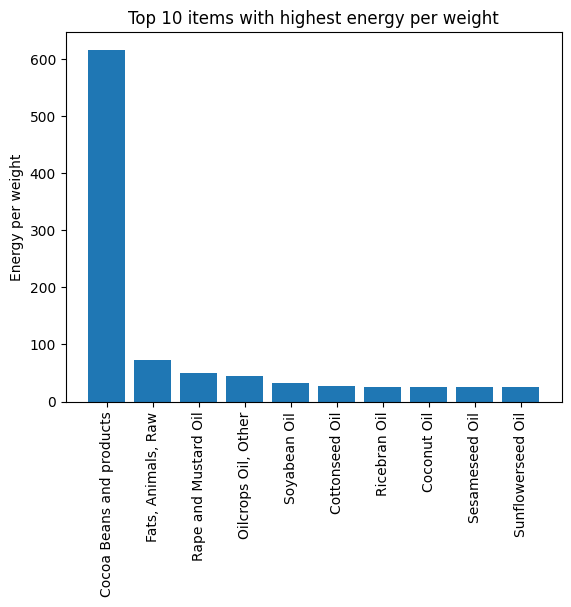

In [ ]:
top_10 = mean_ratios.sort_values(ascending=False).head(10)

plt.bar(top_10.index, top_10.values)
plt.xticks(rotation=90)
plt.ylabel('Energy per weight')
plt.title('Top 10 items with highest energy per weight')
plt.show()

### 13. Quels sont les 10 aliments les plus riches en protéines ? Utiliser un diagramme à barres pour interpréter les résultats.

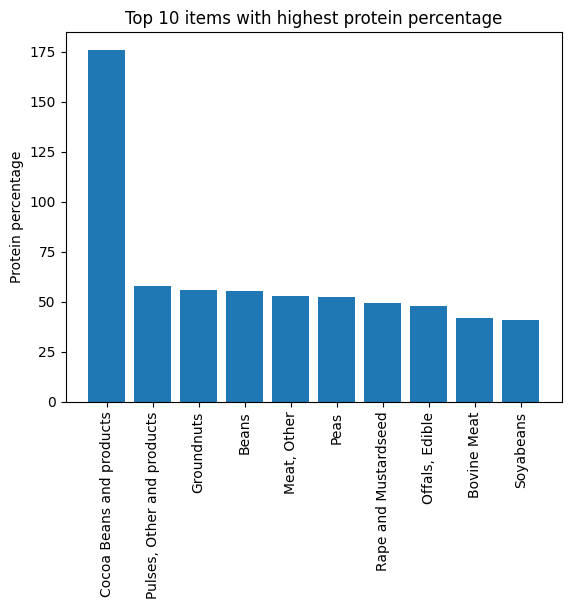

In [ ]:
top_10 = mean_protein_percentages_by_item.sort_values(ascending=False).head(10)

plt.bar(top_10.index, top_10.values)
plt.xticks(rotation=90)
plt.ylabel('Protein percentage')
plt.title('Top 10 items with highest protein percentage')
plt.show()

### 14. Créez une boîte à moustache de la quantité de nourriture disponible par habitant en kcal par zone géographique. 

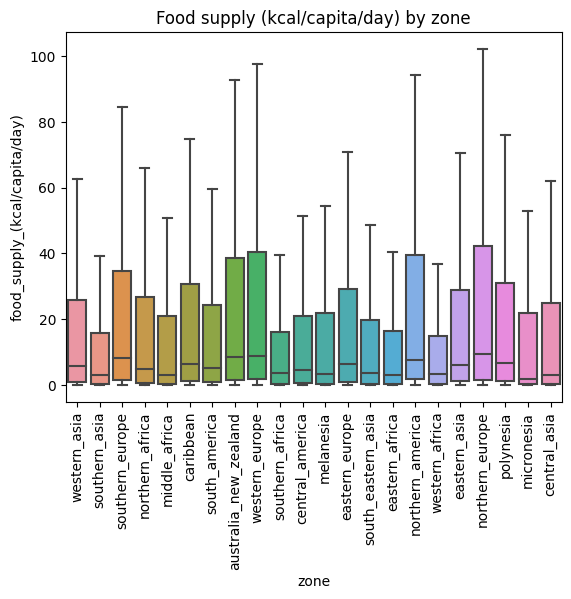

In [ ]:
# Assuming your data is stored in a pandas DataFrame called `df`
sns.boxplot(x='zone', y='food_supply_(kcal/capita/day)', data=df, whis=1.5, showfliers=False)
plt.title('Food supply (kcal/capita/day) by zone')
plt.xticks(rotation=90)
plt.show()

### 15. Avec la disponibilité alimentaire combien d’être humains pourrait-on nourrir ? et avec la disponnibilité alimentaire en végétaux ? Pour répondre à cette question vous avez besoin d’estimer les besoins alimentaires moyens d’une personne, effectuer une recherche pour trouver cette information. Interpréter vos résultats. Exprimer vos résultats sous la forme de % de la population mondiale.

In [214]:
# Estimation du nombre de personnes que l'on peut nourrir avec la disponibilité alimentaire totale en 2019

pop_monde_2019 #pop mondiale en 2019

dispo_alim_total_2019 = (df.loc[df_masque_2019, "food_supply_(kcal/capita/day)"] * 365).sum() # Disponibilité alimentaire totale en kilocalories par an et par habitant en 2019

personnes_nourries_total_2019 = dispo_alim_total_2019 / 2500 # Nombre de personnes que l'on peut nourrir avec la disponibilité alimentaire totale en 2019

pourcentage_pop_nourrie_total_2019 = personnes_nourries_total_2019 / pop_monde_2019 * 100 # Pourcentage de la population mondiale que l'on peut nourrir avec la disponibilité alimentaire totale en 2019

print("Pourcentage de la population mondiale que l'on peut nourrir avec la disponibilité alimentaire totale en 2019 : {:.2f}%".format(pourcentage_pop_nourrie_total_2019))

#Problem
print(pop_monde_2019)
print (dispo_alim_total_2019)
print(personnes_nourries_total_2019)

Pourcentage de la population mondiale que l'on peut nourrir avec la disponibilité alimentaire totale en 2019 : 0.00%
7668811999.999999
196254787.75
78501.9151


In [206]:
# Estimation du nombre de personnes que l'on peut nourrir avec la disponibilité alimentaire en végétaux en 2019
pop_monde_2019 #pop mondiale en 2019
dispo_alim_vegetaux_2019 = (df.loc[(df["type"] == "vegetal") & df_masque_2019, "food_supply_(kcal/capita/day)"] * 365).sum() # Disponibilité alimentaire en végétaux en kilocalories par an et par habitant en 2019
personnes_nourries_vegetaux_2019 = dispo_alim_vegetaux_2019 / 2500 # Nombre de personnes que l'on peut nourrir avec la disponibilité alimentaire en végétaux en 2019
pourcentage_pop_nourrie_vegetaux_2019 = personnes_nourries_vegetaux_2019 / pop_monde_2019 * 100 # Pourcentage de la population mondiale que l'on peut nourrir avec la disponibilité alimentaire en végétaux en 2019
print("Pourcentage de la population mondiale que l'on peut nourrir avec la disponibilité alimentaire en végétaux en 2019 : {:.2f}%".format(pourcentage_pop_nourrie_vegetaux_2019))


Pourcentage de la population mondiale que l'on peut nourrir avec la disponibilité alimentaire en végétaux en 2019 : 0.00%


### 16. Bonus : Avec la nourriture destinée aux animaux combien d’humains pour être nourris ? (Vous devez récupérer plus d’informations sur le site de la FAO)